In [1]:
import numpy as np

def add_Intercept(X):
    new_X = np.zeros((X.shape[0], X.shape[1] + 1), dtype = X.dtype)
    new_X[:, 0] = 1
    new_X[:, 1:] = X
    
    return new_X

In [2]:
class LogisticRegression:
    
    def __init__(self, step_size = 0.01, delta = 1e-5):
        self.theta = None
        self.step_size = step_size
        self.delta = delta
        
    def predict(self, X):
        if self.theta.any() == None:
            raise Exception("Error. Model not trained yet.")
        
        z = np.matmul(self.theta, np.transpose(X))
        return 1 / (1 + np.exp(-1 * z))
    
    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        
        while True:
            y_pred = self.predict(X)
            gradient = ((y_pred - y) * np.transpose(X)).mean(axis = 1)
            print(y_pred.shape)
            print(X.shape)
            hessian = np.matmul((y_pred * (1 - y_pred)) * np.transpose(X), X) / X.shape[0]
            difference = np.matmul(gradient, np.linalg.inv(hessian))
            self.theta -= difference
            print(f"theta = {self.theta}")
            
            if np.linalg.norm(difference) < self.delta:
                print("Training Complete.")
                return self
            
        

In [3]:
import pandas as pd
dataset = pd.read_csv("training_dataset.csv")
print(dataset)

          x_1       x_2    y
0    0.411809  1.105525  0.0
1    1.274746  6.303314  0.0
2    0.115488  3.264251  0.0
3   -0.486306  0.279487  0.0
4    0.257625  1.212389  0.0
..        ...       ...  ...
795  1.724697  5.181074  1.0
796  1.139055  1.332207  1.0
797  0.969095  4.518381  1.0
798  1.957531  6.082968  1.0
799  2.025334  2.729588  1.0

[800 rows x 3 columns]


In [4]:
X_train = dataset.iloc[:,:-1].values
X_train = add_Intercept(X_train)
y_train = dataset.iloc[:,-1].values

print(X_train)
print(y_train)

[[1.         0.41180854 1.10552487]
 [1.         1.27474554 6.30331401]
 [1.         0.11548828 3.26425138]
 ...
 [1.         0.96909526 4.51838094]
 [1.         1.95753102 6.08296767]
 [1.         2.02533402 2.72958809]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [5]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

(800,)
(800, 3)
theta = [-1.26793901  0.96347061  0.00651882]
(800,)
(800, 3)
theta = [-1.86435716  1.24798805  0.05047475]
(800,)
(800, 3)
theta = [-2.18133361  1.11955996  0.15388471]
(800,)
(800, 3)
theta = [-2.35903433  1.05025336  0.2244029 ]
(800,)
(800, 3)
theta = [-2.40601719  1.0350812   0.24374647]
(800,)
(800, 3)
theta = [-2.40859255  1.03437497  0.24480411]
(800,)
(800, 3)
theta = [-2.40859977  1.03437317  0.24480705]
Training Complete.


In [6]:
dataset = pd.read_csv("validation_dataset.csv")
X_valid = dataset.iloc[:,:-1].values
y_valid = dataset.iloc[:, -1].values

print(X_valid)
print(y_valid)

[[-0.3226045   1.44016009]
 [ 1.45213116  2.26274285]
 [ 0.85117646  0.87461786]
 [-0.42506633  0.49448067]
 [ 1.07977541  4.15222455]
 [ 0.06839514  3.60693507]
 [ 3.86229163 25.99079097]
 [ 0.63078087  0.69715553]
 [-0.64119999  0.07896407]
 [ 0.53135242  4.50417546]
 [ 2.19032426  6.54381687]
 [-0.38465533  0.42296288]
 [ 0.21679465  5.01812571]
 [ 0.4846679   1.36387124]
 [ 2.39608694 10.87208984]
 [-0.51197311  0.86848666]
 [ 0.61284557  1.92105571]
 [ 1.20247     1.39818937]
 [ 2.48716225  4.41633191]
 [ 0.27191322  2.48805513]
 [ 0.46650294  3.4560205 ]
 [-0.77155423  0.70674626]
 [ 0.74548073  0.78677636]
 [ 1.34588118  1.84466679]
 [ 0.03825659  1.37679837]
 [ 0.97144296  2.33499786]
 [ 0.73578508  5.36219354]
 [-0.98294485  0.60613226]
 [-1.06748414  0.51752952]
 [ 0.16444179  1.19318199]
 [-0.7898848   1.0424866 ]
 [-0.14329976  0.56735751]
 [-0.82024735  0.49960062]
 [ 0.66933574  2.03132583]
 [ 2.18580501  4.79542536]
 [ 1.24524603  2.22477477]
 [-0.38608243  1.17125926]
 

<Figure size 432x288 with 0 Axes>

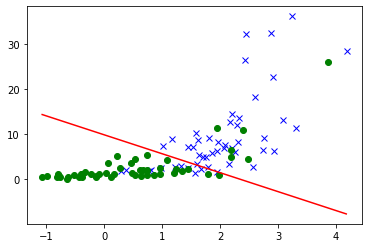

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure()
plt.plot(X_valid[y_valid == 1, 0], X_valid[y_valid == 1, 1], 'bx')
plt.plot(X_valid[y_valid == 0, 0], X_valid[y_valid == 0, 1], 'go')

x = np.arange(min(X_valid[:, 0]), max(X_valid[:, 0]), 0.01)
theta = logReg.theta
y = -1 * (theta[0] / theta[2] + theta[1] / theta[2] * x)

plt.plot(x,y, c = 'red')
plt.show()

In [8]:
y_pred = (logReg.predict(add_Intercept(X_valid)) > 0.5).astype(np.int32)
count = 0
for i in range(len(y_valid)):
    if y_pred[i] == y_valid[i]:
        count += 1

print(f"Accuracy = {count / len(y_pred) * 100}%")

Accuracy = 83.0%


In [9]:
np.savetxt("parameters.txt", theta, delimiter = ", ")